<a href="https://colab.research.google.com/github/ianfanggis/ac-data-course/blob/main/Recsys_Week4_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

提升 iCook 使用者的互動、並且讓新作者所創造的食譜能被更多使用者看到

In [75]:
import pandas as pd
import os

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
os.chdir('/content/drive/My Drive/2021_AC_re/W4')
os.listdir()

['recipes.jsonl.gz',
 'ingredients.jsonl.gz',
 'test_user_ids.txt.gz',
 'test_favorites.json.gz',
 'favorites.json.gz',
 'W4.ipynb']

In [78]:
'''
2020 年全年 iCook 上發布的食譜與使用者收藏互動行為資料
食譜

id - 食譜 ID
name - 食譜名稱
description - 食譜描述
user_id - 作者的 ID
servings - 份量資料
time - 所需時間
favorites_count - 指按讚數
dishes_count - 跟著做數量
text_steps_count - 只有文字的步驟數
photo_steps_count - 有圖的步驟數
published_at - 發布時間
'''
recipes_df = pd.read_json('recipes.jsonl.gz', lines=True, compression='gzip')
recipes_df.head()

,id,name,description,user_id,servings,time,favorites_count,dishes_count,text_steps_count,photo_steps_count,published_at
0,319968,鮮奶燉蛋,None,2174869,2.0,15.0,116,0,0,4,2020-01-01 03:08:24
1,319797,初次醃蘿蔔【鬼怪】,前陣子電視重播時才迷上「鬼怪」，雖然穿差著看，但老闆娘的「醃蘿蔔」單配酒就很對味的感覺；沒想...,61374,3.0,5.0,312,3,0,6,2020-01-01 03:14:30
2,311082,零基礎免揉-哈拉Challah辮子麵包\n,不需要理論基礎\n也不需要桌上型攪拌機\n的五分鐘免揉法\n在家就能輕鬆烤出香噴噴的麵包\n...,1639091,0.0,NaN,23,0,0,9,2020-01-01 03:27:03
3,286167,洋蔥豬扒,簡單的兩樣食材，没有花巧的煮法，美味可口，吃得滿足。,434397,4.0,20.0,31,0,0,5,2020-01-01 04:20:26
4,317195,蒜香肉絲小松菜,None,2147254,0.0,NaN,14,0,4,0,2020-01-01 04:21:12


In [130]:
'''
2020 年全年 iCook 上發布的食譜與使用者收藏互動行為資料
食材

recipe_id - 食譜的 ID
name - 食材名
group_name - 分組名
quantity - 份量
'''
ingredients_df = pd.read_json('ingredients.jsonl.gz', lines=True, compression='gzip')
ingredients_df['recipe_id'] = ingredients_df['recipe_id'].astype(str)
ingredients_df.head()

,recipe_id,quantity,group_name,name
0,50310,半顆,None,蒲瓜
1,50310,排骨 200克,None,排骨
2,50310,1.5克,None,鹽
3,50310,1200cc,None,水
4,70377,適量,None,鮮奶油


In [135]:
'''
2020 年全年 iCook 上發布的食譜與使用者收藏互動行為資料
食譜收藏紀錄


user_id - 收藏的使用者 ID
recipe_id - 收藏的食譜 ID
created_at - 收藏時間
'''
favorites_df = pd.read_json('favorites.json.gz', compression='gzip')
favorites_df[['recipe_id','user_id']] = favorites_df[['recipe_id','user_id']].astype(str)
favorites_df['user_id'] = favorites_df['user_id'].apply(lambda x: x.split('.')[0])

favorites_df.head()
# favorites_df.info()

,recipe_id,user_id,created_at
0,319968,1474700,2020-01-01 04:30:24
1,319968,2897690,2020-01-01 04:41:12
2,319968,938575,2020-01-01 05:00:42
3,319968,839280,2020-01-01 05:13:30
4,319968,1292248,2020-01-01 05:19:50


In [137]:
'''
2021 年 1~3 月 iCook 上有按讚收藏上述食譜的使用者 IDs 與實際收藏的食譜 IDs（評估推薦系統使用）
'''
test_favorites_df = pd.read_json('test_favorites.json.gz', compression='gzip')
test_favorites_df[['user_id','recipe_id']] = test_favorites_df[['user_id','recipe_id']].astype(str)
display(test_favorites_df.head())
display(test_favorites_df['user_id'].unique().shape)
# test_favorites_df.info()

,user_id,recipe_id
0,322,352083
1,322,340737
2,349,331236
3,349,351597
4,349,320027


(27001,)

In [139]:
'''
2021 年 1~3 月 iCook 上有收藏上述食譜的使用者 IDs
'''

test_user_ids = pd.read_csv('test_user_ids.txt.gz', compression='gzip', names=['user_id'])
test_user_ids['user_id'] = test_user_ids['user_id'].astype(str)
display(test_user_ids.head())
display(test_user_ids['user_id'].unique().shape)
# test_user_ids.info()

,user_id
0,100004
1,1000120
2,1000205
3,1000228
4,1000554


(27001,)

In [84]:
# users = test_user_ids['user_id']
# {user: recipes_df['id'].sample(n=3).tolist() for user in users}


### Random 計算推薦

In [85]:
def recommender(users=[], k=3):
  # 同學的 TODO
  # return { user_id_1: [recipe_ids], user_id_2: [recipe_ids] ... }
  
  # 以下為 Random 推薦實作
  return { user: recipes_df['id'].sample(n=k).tolist() for user in users}

  # 以下為直接抄答案的實作
  # return { user: test_favorites_df[test_favorites_df['user_id'] == user]['recipe_id'].values for user in users}


predictions = recommender(test_user_ids['user_id'])

In [86]:
def evaluate(real_results={}, predicted_results={}):
    '''
    * real_results: dict 真實被收藏的食譜資料
    * predicted_results: dict 利用訓練資料學習的推薦食譜
    * method: str
    * score: float
    '''
    total = 0
    for d in predicted_results:
          total += len(set(predicted_results[d]) & set(test_favorites_df[test_favorites_df['user_id'] == d]['recipe_id']))

    score = total / test_favorites_df.shape[0]
    return score

evaluate(test_favorites_df, predictions)

0.00013879057889550458

### 以下為直接抄答案的實作 計算推薦

In [87]:
def recommender(users=[], k=3):
  # 同學的 TODO
  # return { user_id_1: [recipe_ids], user_id_2: [recipe_ids] ... }
  
  # 以下為 Random 推薦實作
  # return { user: recipes_df['id'].sample(n=k).tolist() for user in users}

  # 以下為直接抄答案的實作
  return { user: test_favorites_df[test_favorites_df['user_id'] == user]['recipe_id'].values for user in users}


predictions = recommender(test_user_ids['user_id'])

In [88]:
def evaluate(real_results={}, predicted_results={}):
    '''
    * real_results: dict 真實被收藏的食譜資料
    * predicted_results: dict 利用訓練資料學習的推薦食譜
    * method: str
    * score: float
    '''
    total = 0
    for d in predicted_results:
          total += len(set(predicted_results[d]) & set(test_favorites_df[test_favorites_df['user_id'] == d]['recipe_id']))

    score = total / test_favorites_df.shape[0]
    return score

evaluate(test_favorites_df, predictions)

1.0

### 測試

#### recipes_df 清理

In [89]:
recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27358 entries, 0 to 27357
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 27358 non-null  int64         
 1   name               27358 non-null  object        
 2   description        22211 non-null  object        
 3   user_id            27358 non-null  int64         
 4   servings           25856 non-null  float64       
 5   time               21132 non-null  float64       
 6   favorites_count    27358 non-null  int64         
 7   dishes_count       27358 non-null  int64         
 8   text_steps_count   27358 non-null  int64         
 9   photo_steps_count  27358 non-null  int64         
 10  published_at       27358 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 2.3+ MB


In [90]:
'''
檢查是否有重複值，沒有
'''
recipes_df[recipes_df.duplicated() == True]

,id,name,description,user_id,servings,time,favorites_count,dishes_count,text_steps_count,photo_steps_count,published_at


In [91]:
'''
約9462筆資料不完整，約資料量的3成
'''
# recipes_df[recipes_df['user_id'].duplicated() == True]
# recipes_df[recipes_df['user_id'] == 967596]
recipes_df[recipes_df.isnull().T.any()].shape[0] / recipes_df.shape[0]

0.35243804371664594

In [92]:
'''
考量想推薦的應該要完整，所以刪除不完整的資料
'''
recipes_df = recipes_df[~recipes_df.isnull().T.any()]
display(recipes_df.shape)

(17716, 11)

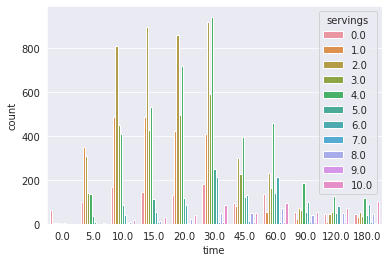

In [93]:
'''
servings - 份量資料
time - 所需時間
'''

sns.countplot(data= recipes_df,x = 'time',hue = 'servings'  )

In [94]:
# 
# recipes_df['published_at'].unique()

In [95]:
recipes_df['published_at'] =recipes_df['published_at'].dt.strftime('%Y-%m')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

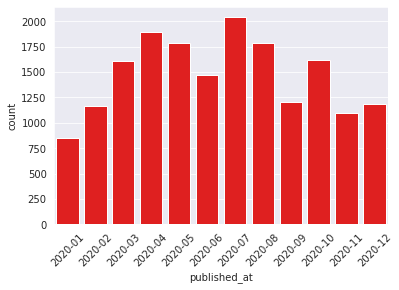

In [96]:
sns.countplot(data= recipes_df,x = 'published_at', color ='r')
plt.xticks(rotation=45)

In [97]:
recipes_df['user_id'].unique().shape

(3129,)

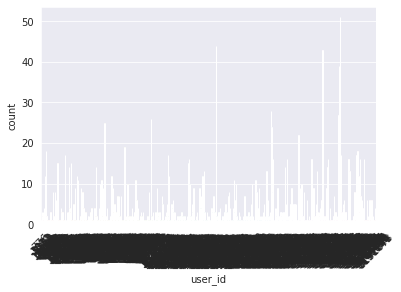

In [98]:
'''
查看在近二個月中，作者發布文章的數量
定義新作者為在 2020-11 - 2020-12且發表文章小於5次的作者
'''
sns.countplot(data = recipes_df.query('published_at > "2020-10"'), x = 'user_id')
plt.xticks(rotation=45)
plt.show()

In [99]:
# sns.countplot(data= recipes_df,x = 'favorites_count', color ='r', hue = 'dishes_count')
# plt.xticks(rotation=45)
'''
按讚數量與跟著做的數量看起來沒關係
'''

recipes_df.groupby(by = 'favorites_count')['dishes_count'].agg({'sum'}).reset_index().sort_values(by = 'sum', ascending = False)

,favorites_count,sum
608,2696,167
38,38,77
410,435,66
40,40,65
587,1064,64
...,...,...
528,679,0
526,673,0
413,438,0
323,328,0


In [100]:
!pip install surprise

In [101]:
from surprise import Reader, Dataset, KNNBasic
import time

#### favorites_df

In [102]:
favorites_df['created_at'] = favorites_df['created_at'].dt.strftime('%Y-%m')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

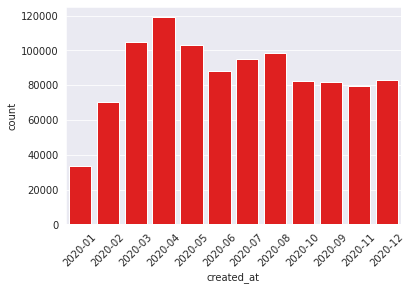

In [103]:
sns.countplot(data= favorites_df,x = 'created_at', color ='r')
plt.xticks(rotation=45)

In [104]:
favorites_df[favorites_df.duplicated() == True]

,recipe_id,user_id,created_at


In [105]:
favorites_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039740 entries, 0 to 1039739
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   recipe_id   1039740 non-null  object
 1   user_id     1039740 non-null  object
 2   created_at  1039740 non-null  object
dtypes: object(3)
memory usage: 23.8+ MB


In [106]:
'''
保留最新一個月
'''
favorites_df = favorites_df.query('created_at > "2020-11"')
print("favorites_df",favorites_df.shape)
favorites_df[['recipe_id','user_id']] = favorites_df[['recipe_id','user_id']].astype(str)
favorites_df.head()

favorites_df (83140, 3)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,recipe_id,user_id,created_at
392,319797,847973,2020-12
393,319797,1379088,2020-12
394,319797,1931926,2020-12
632,319979,1928345,2020-12
731,319982,3053255,2020-12


In [110]:
favorites_df['user_id'].unique().shape

(31317,)

In [111]:
test_user_ids['user_id'].unique().shape

(27001,)

In [117]:
training_data = favorites_df[favorites_df['user_id'].isin(test_user_ids['user_id'])]
display(training_data.head())
display(training_data.shape)

,recipe_id,user_id,created_at
393,319797,1379088,2020-12
632,319979,1928345,2020-12
731,319982,3053255,2020-12
794,319973,938253,2020-12
796,319973,2869059,2020-12


(42497, 3)

In [126]:
def recommender(users=[], k=3):
  # 同學的 TODO
  # return { user_id_1: [recipe_ids], user_id_2: [recipe_ids] ... }
  df = favorites_df.copy()
  re = list(df['recipe_id'].value_counts().keys())[:3]
  return { user: re for user in users}

  
  # 以下為 Random 推薦實作
  # return { user: recipes_df['id'].sample(n=k).tolist() for user in users}

  # 以下為直接抄答案的實作 (XDDDDDDD)
  #return { user: test_favorites_df[test_favorites_df['user_id'] == user]['recipe_id'].values for user in users}


# predictions = recommender(test_user_ids['user_id'])

In [124]:
def evaluate(real_results={}, predicted_results={}):
    '''
    * real_results: dict 真實被收藏的食譜資料
    * predicted_results: dict 利用訓練資料學習的推薦食譜
    * method: str
    * score: float
    '''
    total = 0
    for d in predicted_results:
          total += len(set(predicted_results[d]) & set(test_favorites_df[test_favorites_df['user_id'] == d]['recipe_id']))

    score = total / test_favorites_df.shape[0]
    return score

# evaluate(test_favorites_df, predictions)

In [140]:
evaluate(test_favorites_df, recommender(test_user_ids['user_id']))

0.0060790273556231